<a href="https://colab.research.google.com/github/neillinehan/NeilLinehanPortfolio/blob/main/Physics%20Models/Special_Functions_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
rho = np.linspace(0,1,1000)
theta = np.linspace(0,2*np.pi,1000)

In [ ]:
RHO,THETA = np.meshgrid(rho,theta)

In [ ]:
x = RHO * np.cos(THETA)
y = RHO * np.sin(THETA)

In [ ]:
R = 1

In [ ]:
PHI = 50
for k in range(1,60):
  PHI += (RHO/R)**k * np.sin(k*THETA) * 100 * ((-1)**k-1) /np.pi/k


In [ ]:
from matplotlib.colors import LinearSegmentedColormap
colors = [(.2, .6, 1),(1, .3, .1), ]
cm = LinearSegmentedColormap.from_list(
        "Custom", colors, N=200)

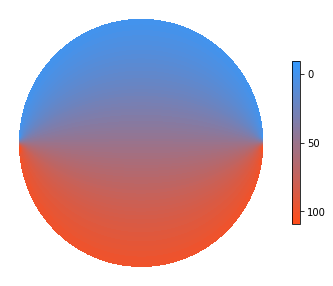

In [ ]:
plt.figure(figsize=(6,5))
plt.ylim(-1.1,1.1)
plt.xlim(-1.1,1.1)
plt.tick_params(bottom=False,labelbottom=False,left=False,labelleft=False)
plt.box(False)
plt.contourf(x,y,PHI,levels=100,cmap=cm,)
cbar = plt.colorbar(boundaries=(0,100),ticks=(0,50,100),shrink=.6);
cbar.ax.invert_yaxis()
plt.savefig('BF6HeatDisk.png')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
rho = np.linspace(0,1,1000)
theta = np.linspace(0,2*np.pi,1000)
RHO,THETA = np.meshgrid(rho,theta)
x = RHO * np.cos(THETA)
y = RHO * np.sin(THETA)
R = 1
PHI = 50
for k in range(1,101):
  PHI += (RHO/R)**k * np.sin(k*THETA) * 100 * ((-1)**k-1) /np.pi/k
from matplotlib.colors import LinearSegmentedColormap
colors = [(.2, .6, 1),(1, .3, .1), ]
cm = LinearSegmentedColormap.from_list(
        "Custom", colors, N=200)
plt.figure(figsize=(6,5))
plt.ylim(-1.1,1.1)
plt.xlim(-1.1,1.1)
plt.tick_params(bottom=False,labelbottom=False,left=False,labelleft=False)
plt.box(False)
plt.contourf(x,y,PHI,levels=100,cmap=cm,)
cbar = plt.colorbar(boundaries=(0,100),ticks=(0,50,100),shrink=.6);
cbar.ax.invert_yaxis()
plt.savefig('BF6HeatDisk.png')

In [ ]:
import pandas as pd
from sklearn.neighbors import KDTree

In [ ]:
E0 = 1
a = 1
Q = 1
rho = np.linspace(.001,5,10)
theta = np.linspace(0,np.pi,10)
phi = np.linspace(0,2*np.pi,10)
RHO,THETA,PHI = np.meshgrid(rho,theta,phi)
x = RHO * np.sin(THETA) * np.cos(PHI)
y = RHO * np.sin(THETA) * np.sin(PHI)
z = RHO * np.cos(THETA)
ep = 1

In [ ]:
Er = E0 * np.cos(THETA) * (2 * a**3 / (RHO**3) + 1 ) + Q / 4 / np.pi / ep / (RHO **2)
Et = E0 * np.sin(THETA) * (a**3 / (RHO**3) -1)
Ep = 0
Ex = Er * np.sin(Et) * np.cos(Ep)
Ey = Er * np.sin(Et) * np.sin(Ep)
Ez = Er * np.cos(Et)

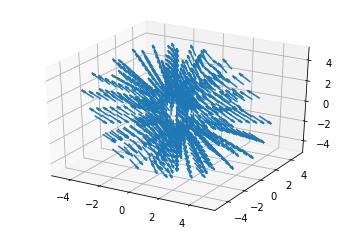

In [ ]:
ax = plt.figure().add_subplot(projection='3d')
ax.quiver(x,y,z,Ex,Ey,Ez,normalize=True,);

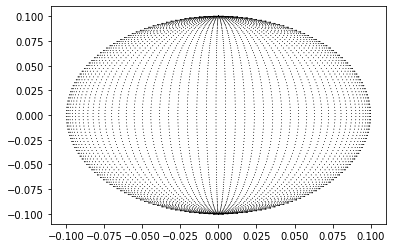

In [ ]:
plt.quiver(x[:,0,:],z[:,0,:],Ex[:,0,:],Ez[:,0,:],norm=True,scale=10,scale_units = 'xy',angles = 'xy');

In [ ]:
X,Y,Z = np.meshgrid(np.linspace(-4,4,30),np.linspace(-4,4,30),np.linspace(-4,4,30))
E0 = 1
a = 1
Q = 1
rho = np.linspace(100000,100001,10)
theta = np.linspace(0,np.pi,10)
phi = np.linspace(0,2*np.pi,10)
RHO,THETA,PHI = np.meshgrid(rho,theta,phi)
x = RHO * np.sin(THETA) * np.cos(PHI)
y = RHO * np.sin(THETA) * np.sin(PHI)
z = RHO * np.cos(THETA)
ep = 1
Er = np.where(RHO > a , E0 * np.cos(THETA) * (2 * a**3 / (RHO**3) + 1 ) + Q / 4 / np.pi / ep / (RHO **2), 0)
Et = np.where(RHO > a, E0 * np.sin(THETA) * (a**3 / (RHO**3) -1),0)
Ep = np.zeros(np.shape(Et))

Ex = Er * np.sin(Et) * np.cos(Ep)
Ey = Er * np.sin(Et) * np.sin(Ep)
Ez = Er * np.cos(Et)

keys = ['x', 'y','z']
coordsyst = np.vstack([x.ravel(), y.ravel(),z.ravel(),Er.ravel(), Et.ravel(),
                       Ep.ravel()])
positionsXYZ = np.vstack([X.ravel(), Y.ravel(),Z.ravel()])
xyzdf= pd.DataFrame(coordsyst.T,columns=('x', 'y','z','Er','Et','Ep',
                                         )).reset_index()
XYZdf= pd.DataFrame(positionsXYZ.T,columns=keys).reset_index()
kdt1 = KDTree(xyzdf[keys].values, leaf_size=5, metric='euclidean')
kdt2 = KDTree(XYZdf[keys].values, leaf_size=5, metric='euclidean')
xyzdf['kNN'] = kdt2.query(xyzdf[keys].values, k=1, return_distance=False)[:,0]
XYZdf['kNN'] = kdt1.query(XYZdf[keys].values, k=1, return_distance=False)[:,0]
kNN1 = xyzdf.merge(XYZdf[['index'] + keys], left_on='kNN', right_on='index',
                  suffixes=('_a', '_b'))
kNN1 = kNN1.drop_duplicates('index_b')
xyk = np.asarray((kNN1['x_b'],kNN1['y_b'],kNN1['z_b']))
E = np.asarray((kNN1['Er'],kNN1['Et'],kNN1['Ep']))


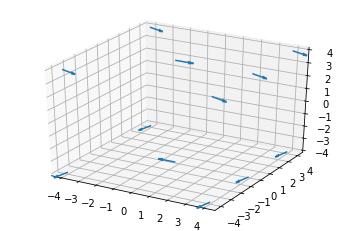

In [ ]:
ax = plt.figure().add_subplot(projection='3d')
ax.quiver(xyk[0],xyk[1],xyk[2],E[0],E[1],E[2],length=1);


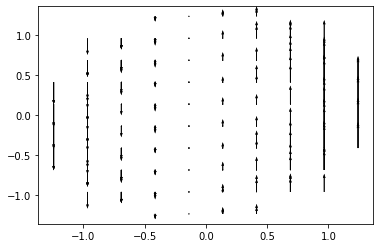

In [ ]:
plt.quiver(xyk[2],xyk[0],E[2],E[0],);

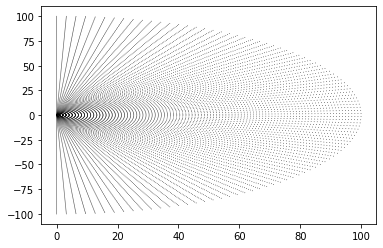

In [ ]:
plt.quiver(x[:,:,0],z[:,:,0],Ex[:,:,0],Ez[:,:,0],norm=True,scale=10,scale_units = 'xy',angles = 'xy');